In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
data_folder = Path("C:/Users/danie/Documents/py-data-analysis/bls-dev-wages")
file_to_open = data_folder / "bls-city-wages-2017.csv"
bls_city_wage_master = pd.read_csv(file_to_open)

In [3]:
patternDel = "           -"
filter = bls_city_wage_master['Annual mean wage(2)'].str.contains(patternDel)
bls_city_wages_2017 = bls_city_wage_master[~filter]

In [4]:
filter = bls_city_wages_2017['Annual median wage(2)'].str.contains(patternDel)
bls_city_wages_2017 = bls_city_wages_2017[~filter]

In [5]:
filter = bls_city_wages_2017['Employment(1)'].str.contains(patternDel)
bls_city_wages_2017 = bls_city_wages_2017[~filter]

In [6]:
bls_city_wages_2017 = bls_city_wages_2017.copy()

In [7]:
bls_city_wages_2017 = bls_city_wages_2017.reset_index(drop=True)
bls_city_wages_2017

,Area Name,Employment(1),Annual mean wage(2),Annual median wage(2)
0,"Abilene, TX(0010180)",60,90590,80470
1,"Akron, OH(0010420)",2260,84430,83680
2,"Albany, GA(0010500)",40,92630,89570
3,"Albany-Schenectady-Troy, NY(0010580)",2260,84390,78690
4,"Albuquerque, NM(0010740)",590,89910,86060
5,"Allentown-Bethlehem-Easton, PA-NJ(0010900)",890,92000,87710
6,"Altoona, PA(0011020)",70,76110,74340
7,"Amarillo, TX(0011100)",100,76120,71300
8,"Ames, IA(0011180)",320,87400,90570
9,"Anaheim-Santa Ana-Irvine, CA Metropolitan Divi...",10070,121120,117090


In [8]:
bls_city_wages_2017["Annual mean wage(2)"] = bls_city_wages_2017["Annual mean wage(2)"].apply(pd.to_numeric)
bls_city_wages_2017["Annual median wage(2)"] = bls_city_wages_2017["Annual median wage(2)"].apply(pd.to_numeric)
bls_city_wages_2017["Employment(1)"] = bls_city_wages_2017["Employment(1)"].apply(pd.to_numeric)

In [9]:
bls_city_wages_2017.dtypes

Area Name                object
Employment(1)             int64
Annual mean wage(2)       int64
Annual median wage(2)     int64
dtype: object

In [11]:
df = bls_city_wages_2017

In [34]:
df_top = df[(df["Annual mean wage(2)"]>110000) & (df_top["Employment(1)"]<20000)]

In [35]:
df_top = df_top.reset_index(drop=True)

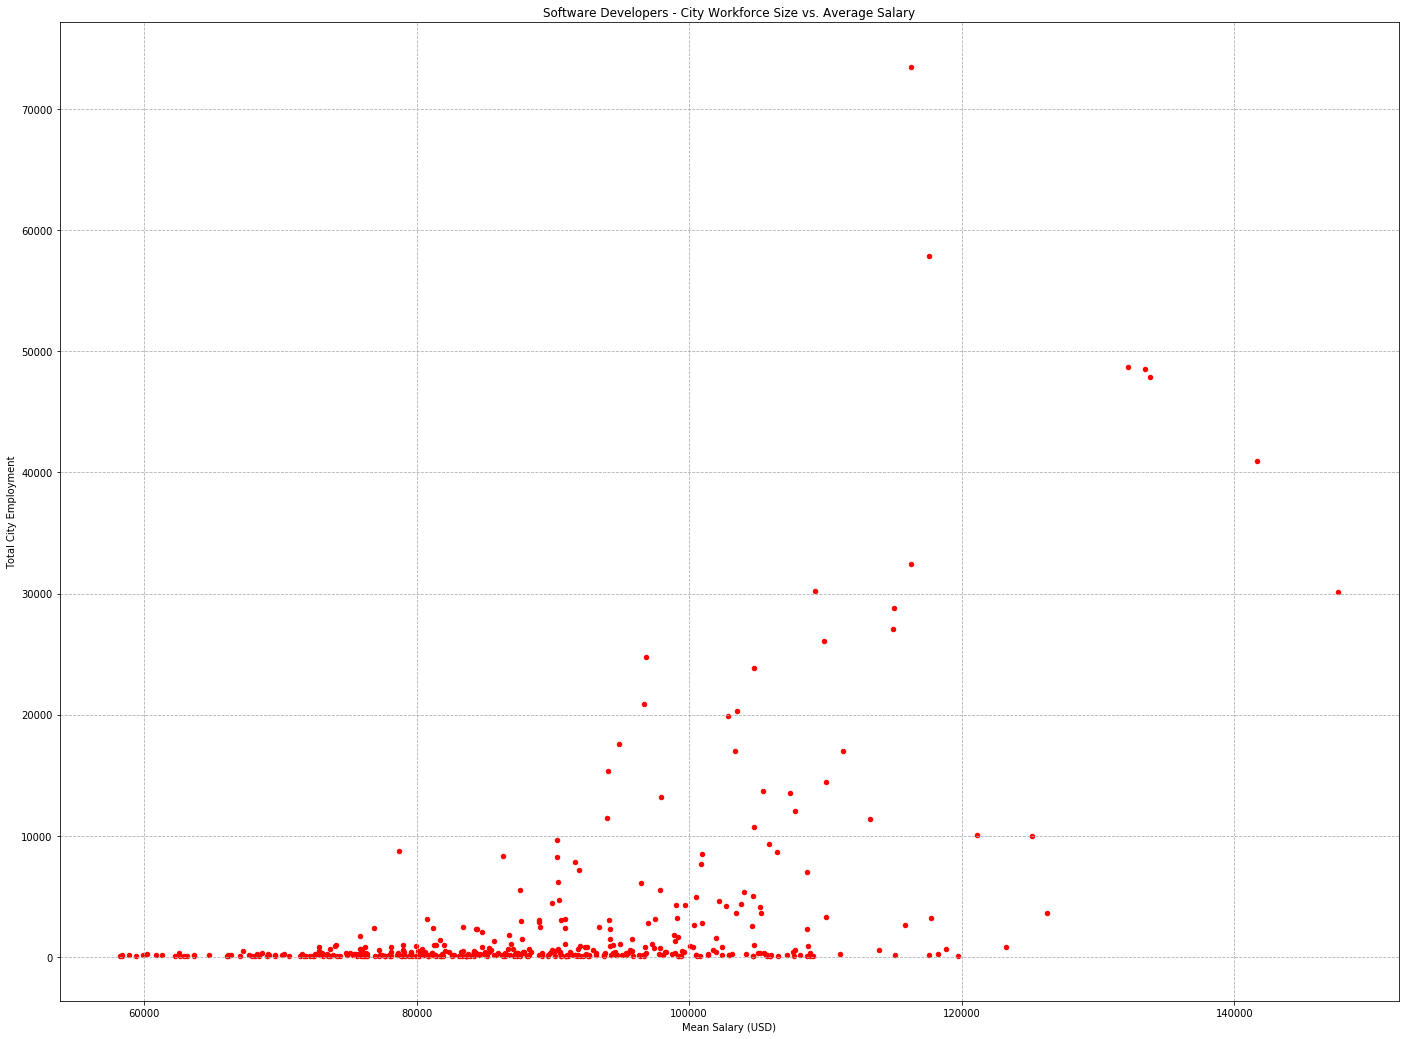

In [10]:
ax = bls_city_wages_2017.plot(kind='scatter', x='Annual mean wage(2)', y='Employment(1)', color='red',figsize=(24,18))
plt.xlabel("Mean Salary (USD)")
plt.ylabel("Total City Employment")
plt.title("Software Developers - City Workforce Size vs. Average Salary")
ax.yaxis.grid(linestyle="--")
ax.xaxis.grid(linestyle='--')

city = bls_city_wages_2017['Area Name']
employment = bls_city_wages_2017['Employment(1)']
salary = bls_city_wages_2017['Annual mean wage(2)']

# for i, txt in enumerate(city):
#     if salary[i] < 115000:
#         continue
#     ax.annotate(txt, (salary[i], employment[i]), xytext=(salary[i] + 1, employment[i] + 1))

plt.show()

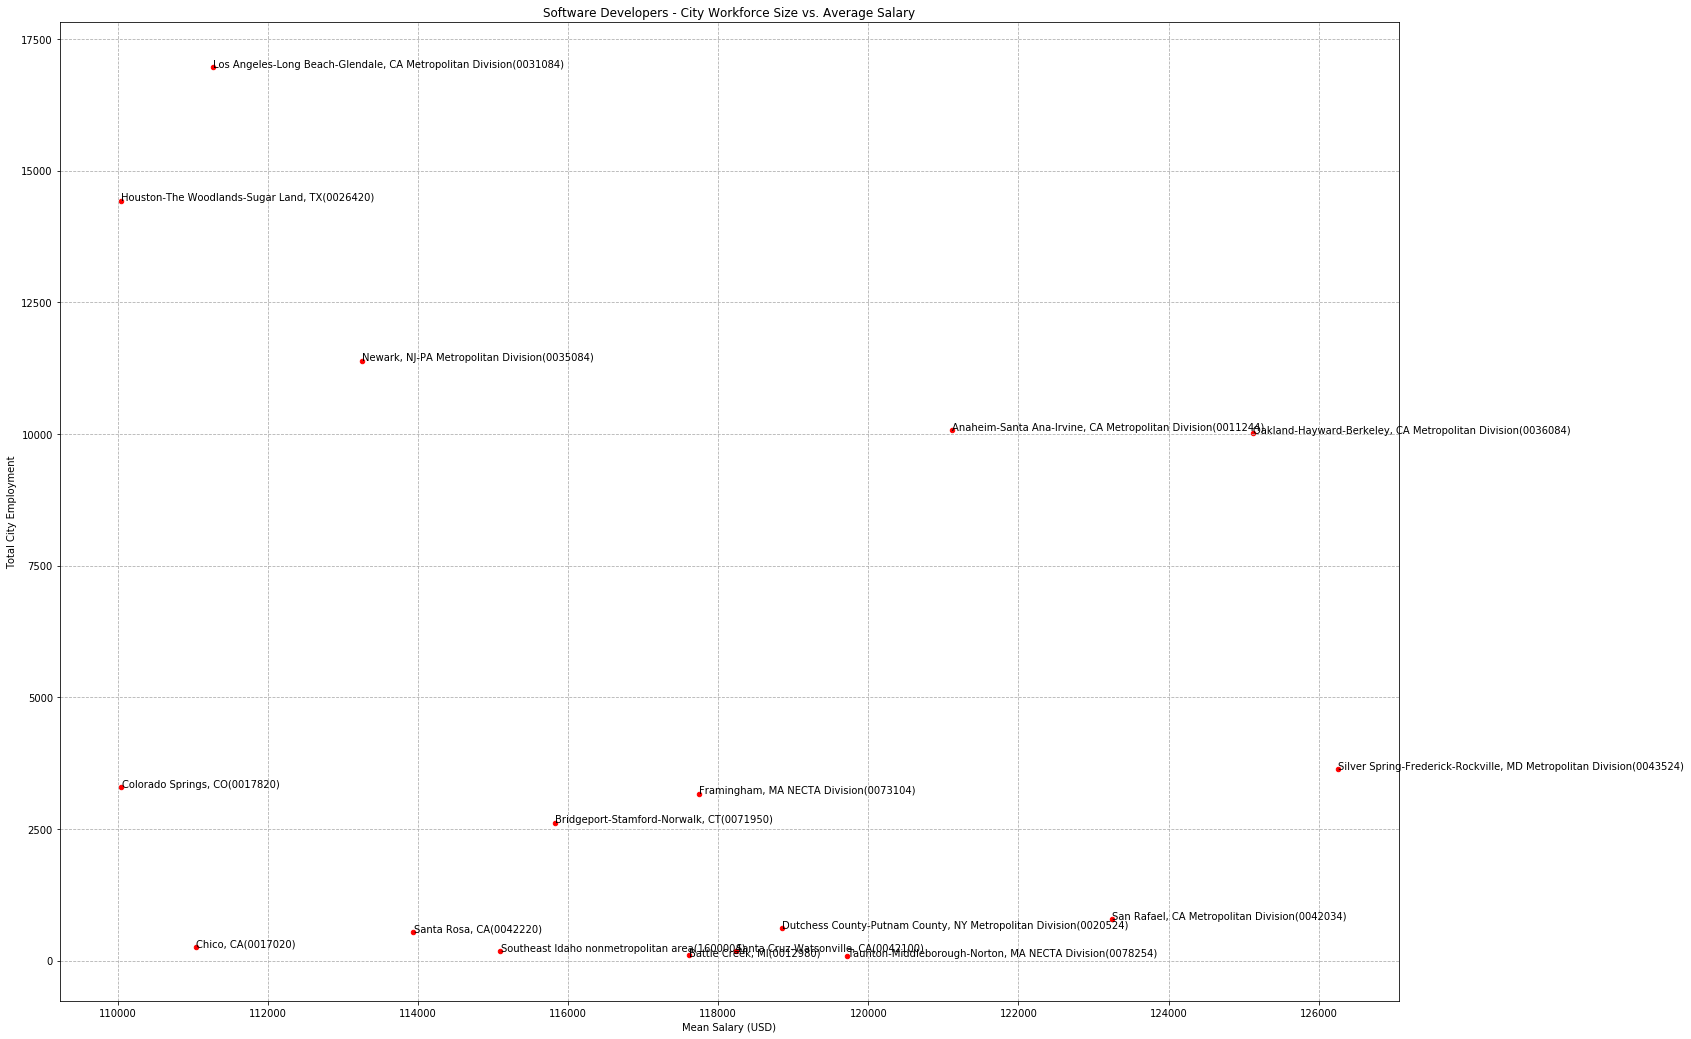

In [36]:
ax = df_top.plot(kind='scatter', x='Annual mean wage(2)', y='Employment(1)', color='red',figsize=(24,18))
plt.xlabel("Mean Salary (USD)")
plt.ylabel("Total City Employment")
plt.title("Software Developers - City Workforce Size vs. Average Salary")
ax.yaxis.grid(linestyle="--")
ax.xaxis.grid(linestyle='--')

city = df_top['Area Name']
employment = df_top['Employment(1)']
salary = df_top['Annual mean wage(2)']

for i, txt in enumerate(city):
    ax.annotate(txt, (salary[i], employment[i]), xytext=(salary[i] + 1, employment[i] + 1))

plt.show()